In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%%Initialisations
#total number of bandit arms
n = 10

#total number of experiments
t = 10000

#probability of random exploration(fraction)
epsilon = []
epsilon = [0,0.01,0.1]

#number of bandits(episodes)
bandit_number = 200

#current value estimate of action
Q = np.zeros((bandit_number,n)) 

#number of times an action was chosen for each bandit
N = np.zeros((bandit_number,n)) 

#optimal action that should be chosen for each bandit
a_opt = np.zeros((bandit_number,n)) 

#initial same values to all the arms
init_value = np.random.normal(loc = 0, scale = 1)
Q_star = np.asarray([[init_value for column in range(n)] for row in range(bandit_number)])
#Q_star = np.random.normal(loc=0,scale=1,size=(bandit_number,n))

#cumulative reward at each episode for chossing an action by probability epsilon
avg_reward = np.asmatrix(np.zeros((len(epsilon),t)))


opt_act = np.asmatrix(np.zeros((len(epsilon),t)))

#function Bandit taking action and bandit as input, returning reward.
def bandit(a,ids):
    R = np.random.normal(loc=Q_star[ids,a],scale=1,size=1)
    return R

In [6]:
#%%A simple bandit algorithm
for k in range(len(epsilon)):
    for episode in range(1, t):
        local_reward = 0.0
        action_history = 0.0
        upper_rewards = 0.0
        for machine in range(1,bandit_number):
            p = np.random.rand()  
            if p <= epsilon[k]:      
                a =  np.random.randint(1,high=n)
            else:
                a = np.argmax(Q[machine,:])

            #reward for choosing an action a for corresponding machine
            rewards = bandit(a,machine)  

            #update number of times action was chosen
            N[machine,a] = N[machine,a] +1 
            
            #update the estimate            
            #Q[machine,a] = Q[machine,a] + (1/N[machine,a])*(rewards-Q[machine,a])
            Q[machine,a] = Q[machine,a] + 0.1*(rewards-Q[machine,a])
            
            #adding the local rewards
            local_reward += rewards
            
            #calculating an optimal action for each bandit
            #action_history += (Q[machine,a])/(np.max(Q_star[machine,:]))
            idx = np.argmax(Q_star[machine,:])
            action_history += (a==idx)

        
        #update Q_star value with a noise 
        Q_star += np.random.normal(loc= 0, scale = 0.01, size = (bandit_number,n))


        avg_reward[k,episode] = (local_reward/bandit_number)
        opt_act[k,episode]= 100*(action_history/bandit_number)

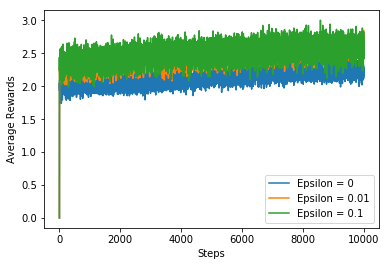

In [7]:
#%%plot graphs for average rewards
for reward in range(len(epsilon)):
    plt.plot(avg_reward[reward,:].T,label = 'Epsilon = ' + str(epsilon[reward]))
    plt.xlabel('Steps')
    plt.ylabel('Average Rewards')
    plt.legend()

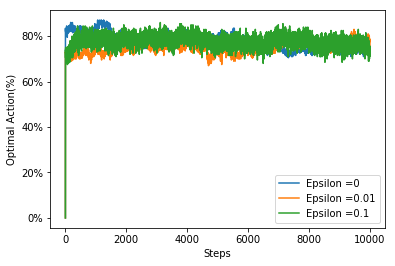

In [8]:
#%%plot graph of percentage of chossing optimal actions
for reward1 in range(len(epsilon)):
    ax = plt.plot(opt_act[reward1,:].T,label='Epsilon =' + str(epsilon[reward1]))
    plt.xlabel('Steps')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
    plt.ylabel('Optimal Action(%)')
    plt.legend()